The latex version of adjacency matrix is 
 \begin{bmatrix}
  0 & 1 & 1 & 1 & 0 & 0 & 0 & 0\\
  1 & 0 & 1 & 0 & 1 & 1 & 0 & 0\\
  1 & 1 & 0 & 0 & 0 & 1 & 0 & 0\\
  1 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
  0 & 1 & 0 & 0 & 0 & 0 & 1 & 0\\
  0 & 1 & 1 & 1 & 0 & 0 & 0 & 1\\
  0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
The adjancency matrix of G is 
 [[0 1 1 1 0 0 0 0]
 [1 0 1 0 1 1 0 0]
 [1 1 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0]
 [0 1 0 0 1 0 1 0]
 [0 1 1 1 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1]]
The edge list of G is 
 [(0, 1, {}), (0, 5, {}), (0, 6, {}), (1, 2, {}), (1, 3, {}), (1, 5, {}), (5, 3, {}), (6, 3, {}), (2, 7, {}), (2, 2, {}), (3, 4, {}), (4, 4, {})]


/opt/homebrew/Caskroom/miniconda/base/envs/CIE500/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:315: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


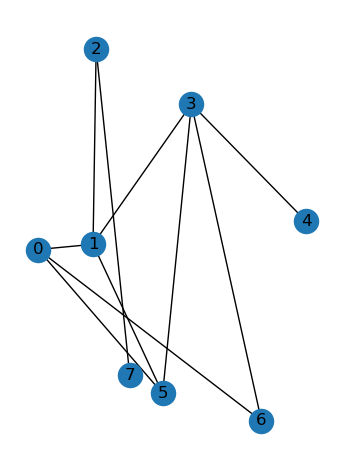

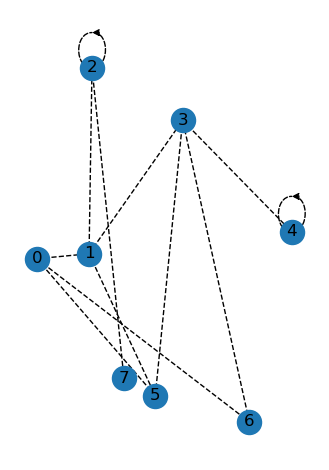

In [ ]:
# %%
import networkx as nx
import random
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

# In the following script we are going to generate a random graph

## First, we generate 8 random nodes in the horizontal space (0,2) and vertical space (0,4)
random.seed(66)
pos = [(random.random() * 2.0, random.random() * 3.0) for _ in range(8)]

## Second, we create an edge list by a given probability.
edge_list = []
for node_pair in combinations(list(range(8)), 2):
    exist_prob = random.random()
    if exist_prob > 0.7:
        edge_list.append(node_pair)
    else:
        continue

## Now, we can create the graph based on the positions and edge list.

G = nx.from_edgelist(edge_list, create_using=nx.Graph)
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, with_labels=True, ax=ax)
plt.tight_layout()
ax.set_aspect("equal")  # set the equal scale of horizontal and vertical
ax.axis("off")  # remove the frame of the generated figure
plt.savefig(
    "/Users/xudongfan/Documents/Courses/CIE500-UrbanNetworks/slides/Unit4/examplegraph.jpg",
    dpi=300,
    bbox_inches="tight",
)


## We can use networkx to get the graph's adjacency matrix
def bmatrix(
    a,
):  # reference source: https://stackoverflow.com/questions/17129290/numpy-2d-and-1d-array-to-latex-bmatrix
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError("bmatrix can at most display two dimensions")
    lines = str(a).replace("[", "").replace("]", "").splitlines()
    rv = [r"\begin{bmatrix}"]
    rv += ["  " + " & ".join(l.split()) + r"\\" for l in lines]
    rv += [r"\end{bmatrix}"]
    return "\n".join(rv)


A = nx.adjacency_matrix(G).toarray()

print(f"The latex version of adjacency matrix is \n {bmatrix(A)}")


# Now let's add a self-loop to the network

G.add_edge(4, 4)
G.add_edge(2, 2)


fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, with_labels=True, ax=ax, arrowstyle="<|-", style="dashed")
plt.tight_layout()
ax.set_aspect("equal")  # set the equal scale of horizontal and vertical
ax.axis("off")  # remove the frame of the generated figure
plt.savefig(
    "/Users/xudongfan/Documents/Courses/CIE500-UrbanNetworks/slides/Unit4/examplegraph_selfloop.jpg",
    dpi=300,
    bbox_inches="tight",
)

# Finally, we can get the edgelist and adjancency matrix from Graph directly.

print(f"The adjancency matrix of G is \n {nx.adjacency_matrix(G).toarray()}")

print(f"The edge list of G is \n {nx.to_edgelist(G)}")